In [121]:
import numpy as np

In [122]:
import pandas as pd
df_target = pd.read_csv("target_hakaton_spb.csv", sep=';', encoding='Windows-1251')
df_target

,gorod,geo_h3_10,lat_h3,lon_h3,atm_category,target,atm_cnt
0,Екатеринбург,8a10c2283357fff,56.865861,60.532224,category4,95.333333,1
1,Екатеринбург,8a10c2288087fff,56.885391,60.588203,category3,30652.666667,4
2,Екатеринбург,8a10c228820ffff,56.891648,60.605399,category2,1162.166667,1
3,Екатеринбург,8a10c2288adffff,56.895039,60.598777,category1,2961.333333,1
4,Екатеринбург,8a10c228944ffff,56.896206,60.625911,category1,2963.333333,1
...,...,...,...,...,...,...,...
533,Санкт-Петербург,8a1106ab67a7fff,59.983488,30.227538,category1,2535.833333,1
534,Санкт-Петербург,8a1106ab6807fff,59.990519,30.205250,category1,23519.500000,2
535,Санкт-Петербург,8a1106ab6807fff,59.990519,30.205250,category4,94.500000,1
536,Санкт-Петербург,8a1106ab6ae7fff,59.996443,30.219656,category2,489.500000,1


# Only Spb

In [123]:
df_companies = pd.read_csv("train/osm_amenity.csv")
data = df_target.merge(df_companies, on=["geo_h3_10"], how='right')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24640 entries, 0 to 24639
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gorod                               438 non-null    object 
 1   geo_h3_10                           24640 non-null  object 
 2   lat_h3                              438 non-null    float64
 3   lon_h3                              438 non-null    float64
 4   atm_category                        438 non-null    object 
 5   target                              438 non-null    float64
 6   atm_cnt                             438 non-null    float64
 7   city                                24640 non-null  object 
 8   Автозапчасти для иномарок           1606 non-null   float64
 9   Авторемонт и техобслуживание (СТО)  3129 non-null   float64
 10  Алкогольные напитки                 2702 non-null   float64
 11  Аптеки                              4081 

In [124]:
data = data.drop(['gorod', 'lat_h3', 'lon_h3'], axis=1)
data

,geo_h3_10,atm_category,target,atm_cnt,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,...,Постаматы,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon
0,8a0bb0200a5ffff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,54.953869,83.163008
1,8a0bb0200b37fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,54.948563,83.153038
2,8a0bb0201cd7fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.958064,83.174064
3,8a0bb0201d97fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,54.953799,83.167407
4,8a0bb0204027fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.935864,83.126481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,8a1106c49667fff,NaN,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,59.708838,30.021463
24636,8a1106cc8367fff,NaN,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.571796,30.123930
24637,8a1106cc9407fff,NaN,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,59.574353,30.139236
24638,8a11154206effff,NaN,NaN,NaN,Нижний Новгород,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.524786,31.234655


In [125]:
# функция для превращения NaN в 0
def recode_empty_cells(dataframe, list_of_columns):

    for column in list_of_columns:
      dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
      dataframe[column] = dataframe[column].fillna(0)

    return dataframe


In [126]:
recode_empty_cells(data, data.columns)

,geo_h3_10,atm_category,target,atm_cnt,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,...,Постаматы,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon
0,8a0bb0200a5ffff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953869,83.163008
1,8a0bb0200b37fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.948563,83.153038
2,8a0bb0201cd7fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.958064,83.174064
3,8a0bb0201d97fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953799,83.167407
4,8a0bb0204027fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.935864,83.126481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,8a1106c49667fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,59.708838,30.021463
24636,8a1106cc8367fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.571796,30.123930
24637,8a1106cc9407fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.574353,30.139236
24638,8a11154206effff,0,0.0,0.0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.524786,31.234655


In [127]:
data['is_atm'] = np.where((data.atm_cnt > 0), 1, 0)
data

,geo_h3_10,atm_category,target,atm_cnt,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,...,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon,is_atm
0,8a0bb0200a5ffff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953869,83.163008,0
1,8a0bb0200b37fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.948563,83.153038,0
2,8a0bb0201cd7fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.958064,83.174064,0
3,8a0bb0201d97fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953799,83.167407,0
4,8a0bb0204027fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.935864,83.126481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,8a1106c49667fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,59.708838,30.021463,0
24636,8a1106cc8367fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.571796,30.123930,0
24637,8a1106cc9407fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.574353,30.139236,0
24638,8a11154206effff,0,0.0,0.0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.524786,31.234655,0


### Только Санкт-Петербург

In [128]:
data_spb = data[data['city'] == 'Екатеринбург']
#data_spb.drop([3472,3473,3474])#stange atm for 3 cities


In [129]:
data_spb_atm_1 = data_spb[data_spb['is_atm'] == 1]
data_spb_atm_1 = data_spb_atm_1[data_spb_atm_1['city'] == 'Екатеринбург']
print(data_spb_atm_1.shape)

data_spb_atm_0 = data_spb[data_spb['is_atm'] == 0]
data_spb_atm_0 = data_spb_atm_0[data_spb_atm_0['city'] == 'Екатеринбург']
print(data_spb_atm_0.shape)

(84, 30)
(3939, 30)


# Алгоритм поиска ближайшего банкомата (минимальное расстояние до банкомата)

In [130]:
for index_atm_0, row_atm_0 in data_spb_atm_0.iterrows():
    print(row_atm_0)
    print(row_atm_0.lat, row_atm_0.lon)
    break

geo_h3_10                             8a0bb031ec0ffff
atm_category                                        0
target                                            0.0
atm_cnt                                           0.0
city                                     Екатеринбург
Автозапчасти для иномарок                         0.0
Авторемонт и техобслуживание (СТО)                0.0
Алкогольные напитки                               0.0
Аптеки                                            1.0
Банки                                             0.0
Быстрое питание                                   0.0
Доставка готовых блюд                             0.0
Женская одежда                                    0.0
Кафе                                              0.0
Косметика / Парфюмерия                            0.0
Ногтевые студии                                   0.0
Овощи / Фрукты                                    0.0
Парикмахерские                                    0.0
Платёжные терминалы         

In [131]:
from geopy.distance import geodesic
from tqdm import tqdm
data_distance = pd.DataFrame(columns=(['geo_h3_10','lat', 'lan', 'distance']))


for index_atm_0, row_atm_0 in tqdm(data_spb_atm_0.iterrows()):
    distance = []
    for index_atm_1, row_atm_1 in data_spb_atm_1.iterrows():
        distance.append(geodesic([row_atm_0.lat, row_atm_0.lon], [row_atm_1.lat, row_atm_1.lon]).km)
    new_row = {'geo_h3_10':row_atm_0.geo_h3_10, 'lat':row_atm_0.lat, 'lan':row_atm_0.lon, 'min_distance':min(distance)}
    data_distance = data_distance.append(new_row, ignore_index=True)
    #print(row_atm_0.geo_h3_10, [row_atm_0.lat, row_atm_0.lon], min(distance))

0it [00:00, ?it/s]C:\Users\dyush\AppData\Local\Temp/ipykernel_8468/3244634974.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyush\AppData\Local\Temp/ipykernel_8468/3244634974.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

2it [00:00, 11.39it/s]C:\Users\dyush\AppData\Local\Temp/ipykernel_8468/3244634974.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyush\AppData\Local\Temp/ipykernel_8468/3244634974.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

4it [00:00, 11.79it/s]C:\Users\dyush\AppData\Local\Temp/ipykernel_8468/3244634974.py:11: FutureWarning:

The frame.append method is deprecated and will 

In [132]:
del data_distance['distance']
data_distance.to_csv('min_distance_to atm')
data_distance

,geo_h3_10,lat,lan,min_distance
0,8a0bb031ec0ffff,54.86246,82.990507,1400.764025
1,8a0bb03288cffff,54.949947,82.835011,1388.322295
2,8a0bb0329cdffff,54.963941,82.851611,1388.874858
3,8a0bb0329d8ffff,54.960764,82.843883,1388.507079
4,8a0bb035406ffff,54.996213,82.96751,1394.902178
...,...,...,...,...
3934,8a10dc9ae267fff,56.695697,60.786605,6.111318
3935,8a10dc9ae35ffff,56.695329,60.784396,6.173371
3936,8a10dc9aed57fff,56.689804,60.75127,7.116378
3937,8a10dc9aed5ffff,56.690173,60.753478,7.103080


In [133]:
data_distance.describe()

,min_distance
count,3939.000000
mean,13.062448
std,126.762164
min,0.138158
25%,0.414666
50%,0.742473
75%,1.433846
max,1411.649147


In [134]:
print(data_distance.sort_values('min_distance').head(20))
print()
print(data_distance.sort_values('min_distance').tail(20))

            geo_h3_10        lat        lan  min_distance
282   8a10c2288b67fff  56.901343  60.589404      0.138158
402   8a10c228981ffff  56.907494  60.612696      0.138164
150   8a10c2283377fff  56.866708  60.530568      0.138164
425   8a10c2289af7fff  56.909243  60.629875      0.138167
438   8a10c2289c57fff  56.900552  60.611545      0.138169
447   8a10c2289ccffff  56.898856  60.614856      0.138170
185   8a10c22880a7fff  56.886238  60.586548      0.138170
441   8a10c2289c87fff  56.896524  60.607644      0.138170
368   8a10c2289537fff  56.894828  60.610954      0.138172
759   8a10c228e597fff  56.863217  60.543273      0.138172
1664  8a10c229d94ffff  56.861523  60.546583      0.138173
217   8a10c22882e7fff    56.8908  60.607054      0.138173
377   8a10c22895affff  56.893132  60.614265      0.138174
1657  8a10c229d86ffff  56.861048  60.550452      0.138176
358   8a10c228946ffff  56.897054  60.624256      0.138176
216   8a10c22882d7fff  56.888733  60.608148      0.138177
394   8a10c228

In [171]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

px.scatter(x=data_distance.index, 
           y=data_distance.sort_values('min_distance')['min_distance']).show()

In [174]:
px.scatter(x=data_distance.index[:3906], 
           y=data_distance.sort_values('min_distance')['min_distance'][:3906]).show()

In [137]:
px.scatter(x=data_distance.index[3906:], 
           y=data_distance.sort_values('min_distance')['min_distance'][3906:]).show()

In [170]:
import pandas as pd
data_distance.sort_values('min_distance',inplace=True)
data_distance.reindex
data_distance1 = data_distance.head(3872)
data_distance1

,geo_h3_10,lat,lan,min_distance
282,8a10c2288b67fff,56.901343,60.589404,0.138158
402,8a10c228981ffff,56.907494,60.612696,0.138164
150,8a10c2283377fff,56.866708,60.530568,0.138164
425,8a10c2289af7fff,56.909243,60.629875,0.138167
438,8a10c2289c57fff,56.900552,60.611545,0.138169
...,...,...,...,...
2250,8a10c26ec8affff,56.621108,60.510234,17.793736
34,8a10c20dd267fff,56.824979,60.061003,27.107377
33,8a10c20dc71ffff,56.800186,60.015391,30.020606
35,8a10c20e8cc7fff,56.893517,59.981513,32.853242


In [139]:
#data_distance = pd.read_csv('min_distance_to_atm.csv')

In [179]:
import folium
map = folium.Map(location=[data_distance1['lat'].mean(),data_distance1['lan'].mean()], zoom_start = 15)
      
for index, row in data_distance1.iterrows():
    if row.min_distance > 5:
        folium.Marker(location=[row.lat, row.lan], icon=folium.Icon(color = 'black')).add_to(map)

In [180]:
#map = folium.Map(location=[df_target['lat_h3'].mean(),df_target['lon_h3'].mean()], zoom_start = 15)
      
for index, row in df_target.iterrows():
    folium.Marker(location=[row.lat_h3, row.lon_h3], icon=folium.Icon(color = 'blue')).add_to(map)

        
map.save("map_stand_clusters_ecatirenburg.html")

## Too far hexagons  

(65, 2)


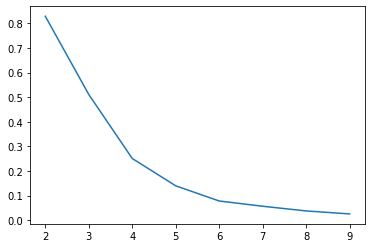

In [183]:
import matplotlib.pyplot as plt
data_distance_far = data_distance1[data_distance1['min_distance'] > 10]
data_distance_far = data_distance_far[['lat','lan']]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
print(data_distance_far.shape)
x = range(2,10)
y = []
silhouette = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(data_distance_far)
  y.append(kmeans.inertia_)
  silhouette.append(silhouette_score(data_distance_far,kmeans.labels_))
plt.plot(x,y)
diff_arr = []
for i in range(7):
  diff_arr.append(y[i]-y[i+1])
diff_arr 
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_distance_far)
cluster_centers = kmeans.cluster_centers_

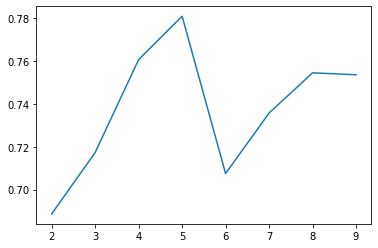

In [185]:
plt.plot(x,silhouette)

Итак, для Екатиренбурга лучше 5 кластеров

In [184]:
#map.save("map_stand_clusters4.html")
map = folium.Map(location=[data_distance1['lat'].mean(),data_distance1['lan'].mean()], zoom_start = 15)
for elem in cluster_centers:
    folium.Marker(location=[elem[0], elem[1]], icon=folium.Icon(color = 'red')).add_to(map)
for index, row in df_target.iterrows():
    folium.Marker(location=[row.lat_h3, row.lon_h3], icon=folium.Icon(color = 'blue')).add_to(map)
map.save("map_stand_clusters_cleaned_ekb_5.html")

#### 6 clusters best for elbow

In [97]:
# добавляем в данные population
df_population = pd.read_csv("data/train/rosstat_population_all_cities.csv")
data_distance.sort_values('min_distance').tail(20)

pd.merge(data_distance, df_population, on=["geo_h3_10"]).sort_values('min_distance').head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/rosstat_population_all_cities.csv'

In [ ]:



df_companies[df_companies['geo_h3_10'] == '8a1104812a2ffff'].T

,12113
geo_h3_10,8a1104812a2ffff
city,Санкт-Петербург
Автозапчасти для иномарок,NaN
Авторемонт и техобслуживание (СТО),NaN
Алкогольные напитки,NaN
Аптеки,NaN
Банки,NaN
Быстрое питание,NaN
Доставка готовых блюд,NaN
Женская одежда,NaN


In [ ]:
df_population[df_population['geo_h3_10'] == '8a110441ea57fff']

,geo_h3_10,city,population,lat,lon
